<a href="https://colab.research.google.com/github/laytio/Ticketing-system-Task/blob/main/Ticketing_system_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install the required libraries**


In [1]:
# Install the required libraries
!pip install pandas scikit-learn matplotlib seaborn nltk transformers torch arabic_reshaper wordcloud
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# **Loading the dataset**

In [ ]:
# Importing the pandas library for data manipulation
import pandas as pd

# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('/content/Book11.csv')

# Display the first five rows of the DataFrame to understand its structure and contents
print(data.head())


     No.         Date  1st-Response Date  Close Date  \
0  35209  44742.58333        44742.58889         NaN   
1  35185  44742.38472        44742.40764         NaN   
2  35182  44742.32847        44742.33889         NaN   
3  35163  44741.50000        44741.50139         NaN   
4  35158  44741.47014        44741.47708  44742.5625   

                                        Request Type  \
0     MOH Central IT General : End User Devices : PC   
1                     MOH Central IT General : Other   
2  MOH Central IT General : Network : New Network...   
3     MOH Central IT General : End User Devices : PC   
4      MOH Central IT General : Security : Kaspersky   

                                             Subject  \
0  طلب اصلاح جهاز بعيادة العظام - مستشفى السليل ا...   
1  إعادة توجيه: إعادة توجيه: احتياج المستشفى من ا...   
2                      انشاء 10 نقاط جديدة بشكل عاجل   
3                                         PC BROBLEM   
4             تحديث برنامج كاسبر _مستشفى شقراء

# **data visualization**

In [ ]:
# Check the tail of the dataset
data.tail()

,No.,Date,1st-Response Date,Close Date,Request Type,Subject,Status,Priority,Company,Location,Request Detail,Notes,Brand Name,Device Serial Number
1058,27555,44563.50069,44563.50139,44575.69653,MOH Central IT General : Security : Firewall :...,اضافة IP على DNS الخاص بمستشفى الرس العام,Closed,Medium,MOH-MIS-Qassim,Qassim-medium-Alrass Hospital,اتاحة خاصية لتمكنا من الدخول على DNS الخاص بال...,"<note date=""1/20/22 7:59 pm"" author=""wd.mutasi...",,
1059,27545,44563.47708,44563.48542,44566.87292,MOH Central IT General : End User Devices : Pr...,عطل بطابعة قسم القانونية والاتزام,Closed,Medium,MOH-MIS-Qassim,Qassim-medium-Alrass Hospital,طابعة متعطله بقسم القانونية والالتزام\r\rاسم ا...,"<note date=""1/4/22 8:52 pm"" author=""rashid.hus...",HP,vnc4359064
1060,27540,44563.44306,44563.44444,44564.57014,MOH Central IT General : End User Devices : Pr...,طابعه لاتعمل,Closed,Medium,MOH-MIS-Qassim,Qassim-small-Albekeryah Hospital,السادة شركة المعمر المحترمين\r\rال...,"<note date=""1/2/22 10:45 am"" author=""rashid.hu...",Null,Null
1061,27533,44563.41458,44563.41528,44564.63681,MOH Central IT General : Security : Firewall :...,مشكله برنامج العيادة الافتراضيه والبرامج الاداريه,Closed,Medium,MOH-MIS-Riyadh,Riyadh-Tele-Wathelan Hospital,السلام عليكم ورحمة الله وبركاته\r\rالسادة شركة...,"<note date=""1/2/22 3:16 pm"" author=""Omar.Mukht...",,
1062,27530,44563.40486,44563.40694,44565.95764,MOH Central IT General : End User Devices : Sc...,scan,Closed,Medium,MOH-MIS-Riyadh,Riyadh-Advanced-Alyamamah Hospital,صيانة scan kodack\r\r\r\r\rتنبيه بإخلاء المسئو...,"<note date=""1/3/22 10:57 pm"" author=""A.Javed@c...",,


In [ ]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No.                   1063 non-null   int64  
 1   Date                  1063 non-null   float64
 2   1st-Response Date     1063 non-null   float64
 3   Close Date            1063 non-null   object 
 4   Request Type          1063 non-null   object 
 5   Subject               1063 non-null   object 
 6   Status                1063 non-null   object 
 7   Priority              1063 non-null   object 
 8   Company               1063 non-null   object 
 9   Location              1063 non-null   object 
 10  Request Detail        1063 non-null   object 
 11  Notes                 1063 non-null   object 
 12  Brand Name            1063 non-null   object 
 13  Device Serial Number  1063 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 116.4+ KB


In [ ]:
# Describe the dataset with various summary and statistics
data.describe()

,No.,Date,1st-Response Date
count,1063.000000,1063.000000,1063.000000
mean,31442.286924,44652.014522,44651.944302
std,2117.458564,53.329518,53.422992
min,27530.000000,44563.404860,44537.852080
25%,29817.000000,44606.973960,44606.735415
50%,31411.000000,44644.586810,44644.588190
75%,33163.500000,44700.397570,44700.397920
max,35209.000000,44742.583330,44742.588890


In [ ]:
# Find out the null value counts in each column
data.isnull().sum()

,0
No.,0
Date,0
1st-Response Date,0
Close Date,0
Request Type,0
Subject,0
Status,0
Priority,0
Company,0
Location,0


In [ ]:
# Let's look at the rows with null values
data[pd.isnull(data).any(axis=1)]

,No.,Date,1st-Response Date,Close Date,Request Type,Subject,Status,Priority,Company,Location,Request Detail,Notes,Brand Name,Device Serial Number


In [ ]:
# NULL replacement
data.fillna(str(), inplace=True)
data[pd.isnull(data).any(axis=1)]

,No.,Date,1st-Response Date,Close Date,Request Type,Subject,Status,Priority,Company,Location,Request Detail,Notes,Brand Name,Device Serial Number


In [ ]:
# verify the replacement
data.isnull().sum()

,0
No.,0
Date,0
1st-Response Date,0
Close Date,0
Request Type,0
Subject,0
Status,0
Priority,0
Company,0
Location,0



# Text Cleaning Function for Preprocessing Ticket Data

In [ ]:
import re  # Importing the re module for regular expression operations

def clean_text(text):
    # Define patterns to remove from the text
    patterns = [
        r'--\s*[\w\s]+$',  # Simplified pattern for email signature
        r'\bconfidentiality notice\b.*',  # Pattern to match confidentiality notices
        r'\*[^*]*\*',  # Pattern to match text enclosed in asterisks
        r'\تنبيه بإخلاء المسئولية\b.*'  # Pattern to match disclaimer notices in Arabic
    ]

    # Loop through each pattern and apply the substitution
    for pattern in patterns:
        text = re.sub(pattern, '', text, flags=re.DOTALL | re.IGNORECASE)

    # Return the cleaned text
    return text

# Apply the clean_text function to the 'Request Detail' column,
# creating a new column 'Request_Detail_Clean' to store the cleaned text.
data['Request_Detail_Clean'] = data['Request Detail'].apply(lambda x: clean_text(x) if pd.notnull(x) else '')


# Function to Remove Extra Spaces and Normalize Whitespace

In [ ]:
def remove_extra_spaces(text):
    # Remove multiple consecutive whitespace characters (spaces, tabs, newlines, carriage returns)
    text = re.sub(r'\s+', ' ', text)

    # Remove leading and trailing whitespace
    text = text.strip()

    return text

# Example text with extra spaces and newlines

# Remove extra spaces
data['Request_Detail_Clean'] = data['Request_Detail_Clean'].apply(lambda x: remove_extra_spaces(x) if pd.notnull(x) else '')


In [ ]:
# Accessing the cleaned request details from the DataFrame
data['Request_Detail_Clean']


,Request_Detail_Clean
0,نفيد سعادتكم بوجود مشكله في جهاز عيادة العظام ...
1,________________________________ من: Ahmed Ibr...
2,شركة المعمر الأعزاء نقيدكم بانشاء نقاط جديدة و...
3,بعض القطع في الجهاز تحتاج تركيب Serial number ...
4,السلام عليكم الى شركة المعمر الموقره نود منكم ...
...,...
1058,اتاحة خاصية لتمكنا من الدخول على DNS الخاص بال...
1059,طابعة متعطله بقسم القانونية والالتزام اسم الطا...
1060,السادة شركة المعمر المحترمين السلام عليكم ورحم...
1061,السلام عليكم ورحمة الله وبركاته السادة شركة ال...


#Tokenization and Stopword Removal Setup Using NLTK


In [ ]:
# Importing the word_tokenize function from nltk for tokenizing text into words
from nltk.tokenize import word_tokenize

# Downloading the 'stopwords' dataset from NLTK for filtering out common words
nltk.download('stopwords')
# Downloading the 'punkt' tokenizer models from NLTK for tokenization
nltk.download('punkt')

# Creating a set of English stopwords
stop_words_en = set(stopwords.words('english'))
# Creating a set of Arabic stopwords
stop_words_ar = set(stopwords.words('arabic'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Comprehensive Text Cleaning and Tokenization for Request Details and Notes

In [ ]:
# Function to clean the input text
def clean_text(text):
    # Check if the input is not a string; if not, return an empty string
    if not isinstance(text, str):
        return ''

    # Remove all punctuation from the text
    text = re.sub(r'[^\w\s]', '', text)
    # Remove all digits from the text
    text = re.sub(r'\d+', '', text)

    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    # Filter out stopwords for both English and Arabic
    tokens = [word for word in tokens if word not in stop_words_en and word not in stop_words_ar]

    # Join the cleaned tokens back into a single string
    return ' '.join(tokens)

# Apply the clean_text function to the 'Request_Detail_Clean' column, creating a cleaned version of the text
data['Request_Detail_Clean'] = data['Request_Detail_Clean'].apply(lambda x: clean_text(x) if pd.notnull(x) else '')
# Apply the clean_text function to the 'Notes' column, creating a new cleaned version of the text
data['Notes_Clean'] = data['Notes'].apply(lambda x: clean_text(x) if pd.notnull(x) else '')

# Display the first five rows of the cleaned request details and notes
print(data[['Request_Detail_Clean', 'Notes_Clean']].head())


                                Request_Detail_Clean  \
0  نفيد سعادتكم بوجود مشكله جهاز عيادة العظام انه...   
1  ________________________________ ahmed ibrahim...   
2  شركة المعمر الأعزاء نقيدكم بانشاء نقاط جديدة و...   
3      القطع الجهاز تحتاج تركيب serial number blzqzi   
4  السلام عليكم الى شركة المعمر الموقره نود منكم ...   

                                         Notes_Clean  
0  note date pm authoraabdullkareemccscomsa typet...  
1  note date authormezzatccscomjo typetech time r...  
2                                                     
3  note date pm authormezzatccscomjo typetech tim...  
4  note date pm authoromarmukhtarccscomsa typetec...  


In [ ]:
data['Request_Detail_Clean'][0]

'نفيد سعادتكم بوجود مشكله جهاز عيادة العظام انه يمكن الدخول وفتح الجهاز بيوزر موظف وزاره الصحة نوع الجهاز deel optiplex رقم الجهاز dlhpj برجاء الاطلاع وتوجيه المختصين ليدكم لحل المشكلة ولكم جزيل الشكر مدير تقنية المعلومات بمستشفى السليل العام منصور بن عبدالله الحابي mansour abdullah alhabi'

#Displaying Original vs Cleaned Text for Request Details and Notes


In [ ]:
# Print a message indicating that the original text will be displayed before cleaning
print("Before Cleaning:")
# Display the first five rows of the original 'Request Detail' and 'Notes' columns
print(data[['Request Detail', 'Notes']].head())

# Print a newline for better separation in output
print("\nAfter Cleaning:")
# Display the first five rows of the cleaned 'Request_Detail_Clean' and 'Notes_Clean' columns
print(data[['Request_Detail_Clean', 'Notes_Clean']].head())


Before Cleaning:
                                      Request Detail  \
0  *** This is an external email. Be Vigilant and...   
1  *** This is an external email. Be Vigilant and...   
2  *** This is an external email. Be Vigilant and...   
3  *** This is an external email. Be Vigilant and...   
4  *** This is an external email. Be Vigilant and...   

                                               Notes  
0  <note date="6/30/22 2:18 pm" author="a.abdullk...  
1  <note date="6/30/22 9:47 am" author="m.ezzat@c...  
2                                                     
3  <note date="6/29/22 12:02 pm" author="m.ezzat@...  
4  <note date="6/29/22 12:01 pm" author="Omar.Muk...  

After Cleaning:
                                Request_Detail_Clean  \
0  نفيد سعادتكم بوجود مشكله جهاز عيادة العظام انه...   
1  ________________________________ ahmed ibrahim...   
2  شركة المعمر الأعزاء نقيدكم بانشاء نقاط جديدة و...   
3      القطع الجهاز تحتاج تركيب serial number blzqzi   
4  السلام عليكم الى

#Counting Missing Values Before and After Text Cleaning


In [ ]:
# Print a message indicating that the count of missing values before cleaning will be displayed
print("Number of missing values before cleaning:")
# Display the count of missing values in the 'Request Detail' and 'Notes' columns
print(data[['Request Detail', 'Notes']].isnull().sum())

# Print a newline for better separation in output
print("\nNumber of missing values after cleaning:")
# Display the count of missing values in the 'Request_Detail_Clean' and 'Notes_Clean' columns
print(data[['Request_Detail_Clean', 'Notes_Clean']].isnull().sum())


Number of missing values before cleaning:
Request Detail    0
Notes             0
dtype: int64

Number of missing values after cleaning:
Request_Detail_Clean    0
Notes_Clean             0
dtype: int64


In [ ]:
print(data[['Request Detail', 'Request_Detail_Clean']].sample(10))
print(data[['Notes', 'Notes_Clean']].sample(10))


                                         Request Detail  \
443   Dear ITteam,\r\r\rGreeting,\r\r\r\rWe have a O...   
855   Dear MIS Support team ,\r\r\r\rWe have a probl...   
460   ,Dear MIS Support team\r We have a problem wit...   
932   السلام عليكم نأمل  المساعدة بضبط عدادات  كمرة ...   
1012  Asalamualikum,\r\rHP Desktop Display Problem.\...   
769   السلام عليكم ورحمة الله وبركاته\r\rنامل منكم ت...   
732   القسم . مدير الصيانة\r\rالعطل . شبكة مستشفى ال...   
349   السلام عليكم\r\rأخواننا في شركة المعمر نأمل من...   
121   Date/Time Event 2022-06-06 11:12 AST\r\rThreat...   
918   Hello,\r\rWe have a Dell Laptop and have issue...   

                                   Request_Detail_Clean  
443   dear itteam greeting ou folder need someone ex...  
855   dear mis support team problem pc internet work...  
460   dear mis support team problem pc windows ram s...  
932   السلام عليكم نأمل المساعدة بضبط عدادات كمرة الفرز  
1012  asalamualikum hp desktop display problem hp se...  
76

In [ ]:
print(data.columns)


Index(['No.', 'Date', '1st-Response Date', 'Close Date', 'Request Type',
       'Subject', 'Status', 'Priority', 'Company', 'Location',
       'Request Detail', 'Notes', 'Brand Name', 'Device Serial Number',
       'Request_Detail_Clean', 'Notes_Clean'],
      dtype='object')


#Word Frequency Analysis and Data Preparation for Word Clouds


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Word frequency analysis for "Request Detail"
request_words = ' '.join(data['Request_Detail_Clean'])
notes_words = ' '.join(data['Notes_Clean'])


In [ ]:
# Frequency counts
request_freq = Counter(request_words.split())
notes_freq = Counter(notes_words.split())


#Word Cloud Visualization for Most Frequent Words in Request Detail


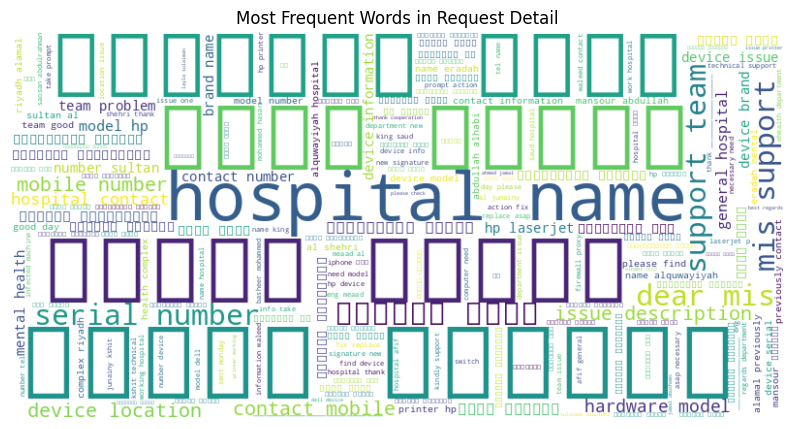

In [ ]:
# Visualize with WordCloud for "Request Detail"
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(request_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Request Detail')
plt.show()


In [ ]:

# Top 10 frequent words
print("Top 10 Words in Request Detail:", request_freq.most_common(10))

Top 10 Words in Request Detail: [('hospital', 667), ('device', 621), ('number', 515), ('عليكم', 405), ('السلام', 394), ('issue', 388), ('dear', 360), ('hp', 359), ('name', 358), ('support', 350)]


#Feature Engineering: Text Length and Word Count with Correlation Matrix Visualization

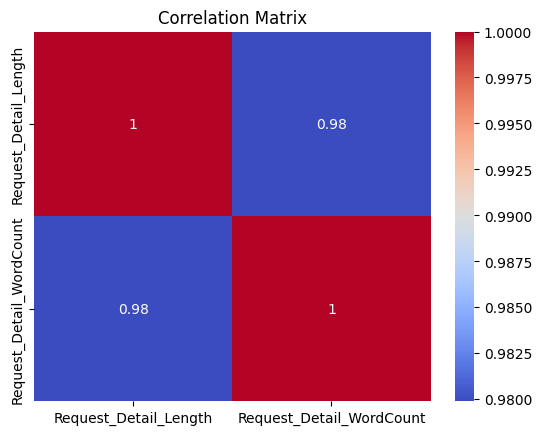

In [ ]:
# Add new features: length of the text and word count
# Calculate the length of the cleaned request detail text and store it in a new column
data['Request_Detail_Length'] = data['Request_Detail_Clean'].apply(lambda x: len(str(x)))
# Calculate the word count of the cleaned request detail text and store it in a new column
data['Request_Detail_WordCount'] = data['Request_Detail_Clean'].apply(lambda x: len(str(x).split()))

# Display the correlation matrix for the newly created features
correlation_matrix = data[['Request_Detail_Length', 'Request_Detail_WordCount']].corr()

# Import seaborn for visualization
import seaborn as sns
# Create a heatmap to visualize the correlation matrix with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Set the title for the heatmap
plt.title('Correlation Matrix')
# Show the plot
plt.show()


#Distribution of Text Lengths in Request Detail Field


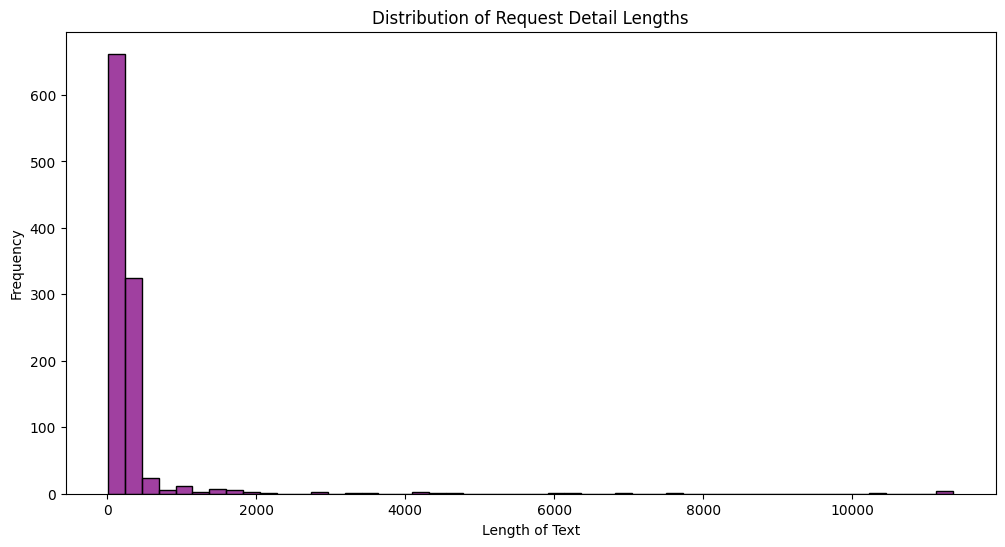

In [ ]:
# Display the distribution of text lengths in the "Request Detail" field
# Set the size of the figure for better visibility
plt.figure(figsize=(12, 6))
# Create a histogram to show the distribution of request detail lengths
sns.histplot(data['Request_Detail_Length'], bins=50, color='purple')
# Set the title for the histogram
plt.title('Distribution of Request Detail Lengths')
# Set the x-axis label
plt.xlabel('Length of Text')
# Set the y-axis label
plt.ylabel('Frequency')
# Show the plot
plt.show()


  # Descriptive Statistics for 'Request_Detail_Length

In [ ]:
print("Descriptive Statistics for 'Request_Detail_Length':")
print(data['Request_Detail_Length'].describe())


Descriptive Statistics for 'Request_Detail_Length':
count     1063.000000
mean       331.864534
std        928.014351
min         10.000000
25%        110.000000
50%        201.000000
75%        269.000000
max      11354.000000
Name: Request_Detail_Length, dtype: float64


#           PCA Dimensionality Reduction


In [ ]:
# Importing PCA for dimensionality reduction and numpy for numerical operations
from sklearn.decomposition import PCA
import numpy as np

# Selecting numerical features for PCA
# Create a DataFrame with the specified numeric features, dropping any rows with missing values
numeric_features = data[['Request_Detail_Length', 'Request_Detail_WordCount']].dropna()

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)  # Set the number of components to 2
pca_result = pca.fit_transform(numeric_features)  # Fit and transform the data

# Display the explained variance ratio for each principal component
print(f"Explained variance by component: {pca.explained_variance_ratio_}")


Explained variance by component: [9.99640483e-01 3.59516802e-04]


#Text Classification Using Predefined Keywords

In [ ]:
# Define custom keywords for label extraction
technical_issue_keywords = ['error', 'fail', 'problem', 'crash', 'unresponsive', 'timeout', 'failure', 'bug', 'issue',
                            'عطل', 'مشكلة', 'خطأ', 'فشل', 'توقف', 'انهيار', 'مشكلة تقنية', 'خطأ في النظام', 'عطل في الجهاز']

# الفئة الثانية: طلبات خدمة
service_request_keywords = ['request', 'service', 'support', 'install', 'setup', 'help', 'upgrade', 'maintenance',
                            'طلب', 'خدمة', 'دعم', 'تركيب', 'إعداد', 'مساعدة', 'صيانة', 'ترقية', 'خدمة عملاء']

# الفئة الثالثة: استفسار عام
general_inquiry_keywords = ['inquiry', 'query', 'question', 'ask', 'clarify', 'information', 'details',
                            'استفسار', 'سؤال', 'طلب توضيح', 'استيضاح', 'معلومات', 'تفاصيل']

def classify_text(text, language='english'):
    """
    Classifies text based on predefined keywords.
    """
    if language == 'arabic':
        if any(keyword in text for keyword in technical_issue_keywords):
            return 'مشكلة تقنية (Technical Issue)'
        elif any(keyword in text for keyword in service_request_keywords):
            return 'طلب خدمة (Service Request)'
        elif any(keyword in text for keyword in general_inquiry_keywords):
            return 'استفسار عام (General Inquiry)'
        else:
            return 'أخرى (Other)'
    else:  # English Text
        if any(keyword in text for keyword in technical_issue_keywords):
            return 'Technical Issue'
        elif any(keyword in text for keyword in service_request_keywords):
            return 'Service Request'
        elif any(keyword in text for keyword in general_inquiry_keywords):
            return 'General Inquiry'
        else:
            return 'Other'

# Apply classification to "Request Detail" and "Notes"
data['Request_Label'] = data['Request_Detail_Clean'].apply(classify_text)
data['Notes_Label'] = data['Notes_Clean'].apply(classify_text)

# Display the new labels
print("Labels after classification:")
print(data[['Request_Label', 'Notes_Label']].head(10))


Labels after classification:
     Request_Label      Notes_Label
0  Technical Issue  Technical Issue
1  Technical Issue  Technical Issue
2            Other            Other
3  Service Request            Other
4  Service Request            Other
5  Technical Issue            Other
6  Technical Issue  Technical Issue
7            Other  Technical Issue
8            Other            Other
9  Technical Issue            Other


#Random Forest Model Training and Feature Importance

In [ ]:
# Importing the RandomForestClassifier for model training
from sklearn.ensemble import RandomForestClassifier

# Prepare the data for use in the model
# X contains the features (numeric_features) used for training
X = numeric_features
# y contains the labels for classification; dropping any missing values
y = data['Request_Label'].dropna()  # The column extracted for final classification

# Train a Random Forest model to determine feature importance
clf = RandomForestClassifier()  # Create an instance of the Random Forest classifier
clf.fit(X, y)  # Fit the model to the training data

# Extract feature importances from the trained model
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
# Print the feature importances sorted in descending order
print("Feature Importance:\n", feature_importances.sort_values(ascending=False))


Feature Importance:
 Request_Detail_Length       0.65119
Request_Detail_WordCount    0.34881
dtype: float64


#Feature Engineering: Technical Issue Keyword Presence

In [ ]:
# Extract a new feature: presence of a technical issue keyword
# Check if any of the specified technical issue keywords are present in the cleaned request detail text
data['Has_Technical_Issue_Keyword'] = data['Request_Detail_Clean'].apply(lambda x: 1 if any(keyword in x for keyword in technical_issue_keywords) else 0)

# Display the results
# Show the first row of the cleaned request detail and the new feature indicating the presence of a technical issue keyword
print(data[['Request_Detail_Clean', 'Has_Technical_Issue_Keyword']].head(5))


                                Request_Detail_Clean  \
0  نفيد سعادتكم بوجود مشكله جهاز عيادة العظام انه...   
1  ________________________________ ahmed ibrahim...   
2  شركة المعمر الأعزاء نقيدكم بانشاء نقاط جديدة و...   
3      القطع الجهاز تحتاج تركيب serial number blzqzi   
4  السلام عليكم الى شركة المعمر الموقره نود منكم ...   

   Has_Technical_Issue_Keyword  
0                            1  
1                            1  
2                            0  
3                            0  
4                            0  


# Model Training and Evaluation with Text Features

In [ ]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Prepare data for modeling
# Create a TF-IDF vectorizer to convert text data into feature vectors
tfidf = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X = tfidf.fit_transform(data['Request_Detail_Clean'])  # Transform the cleaned request details into TF-IDF features
y = data['Request_Label']  # Define the target variable (labels)


#Random Forest Classifier: Training and Performance Evaluation

In [ ]:
# Train-test split
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. RandomForest Classifier
rf_model = RandomForestClassifier()  # Create an instance of the Random Forest classifier
rf_model.fit(X_train, y_train)  # Train the model on the training data
y_pred_rf = rf_model.predict(X_test)  # Make predictions on the test set

# Evaluation
print("RandomForest Classifier Performance:")
# Print the classification report for Random Forest model
print(classification_report(y_test, y_pred_rf))

RandomForest Classifier Performance:
                 precision    recall  f1-score   support

General Inquiry       0.00      0.00      0.00         1
          Other       0.94      0.98      0.96       122
Service Request       0.75      0.50      0.60        12
Technical Issue       0.95      0.95      0.95        78

       accuracy                           0.93       213
      macro avg       0.66      0.61      0.63       213
   weighted avg       0.93      0.93      0.93       213



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Support Vector Machine (SVM) Classifier:Training and Performance Evaluation

In [ ]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')  # Create an instance of the SVM classifier with a linear kernel
svm_model.fit(X_train, y_train)  # Train the SVM model on the training data
y_pred_svm = svm_model.predict(X_test)  # Make predictions on the test set

# Evaluation
print("SVM Classifier Performance:")
# Print the classification report for SVM model
print(classification_report(y_test, y_pred_svm))


SVM Classifier Performance:
                 precision    recall  f1-score   support

General Inquiry       0.00      0.00      0.00         1
          Other       0.87      0.95      0.91       122
Service Request       1.00      0.58      0.74        12
Technical Issue       0.92      0.86      0.89        78

       accuracy                           0.89       213
      macro avg       0.70      0.60      0.63       213
   weighted avg       0.89      0.89      0.89       213



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#legacy Feature Extraction Using TF-IDF and Train-Test Split

In [ ]:

# Legacy feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['Request_Detail_Clean'])
y = data['Request_Label']

# Train-test split for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


#PCA on TF-IDF Features with Visualization

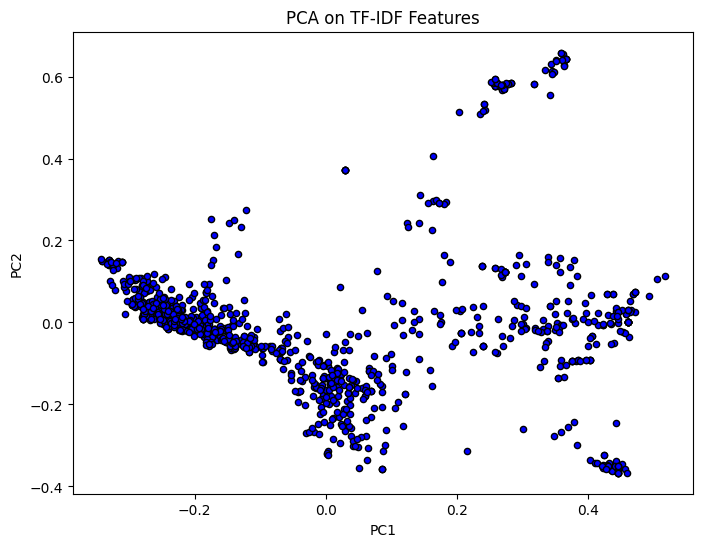

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Step 1: TF-IDF Vectorization (to transform the textual data into numerical form)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['Request_Detail_Clean'])  # Assuming cleaned_text is the column with preprocessed data

# Step 2: Apply PCA to reduce the dimensionality of the TF-IDF vectors
pca = PCA(n_components=2)  # Reducing to 2 components for easy visualization
X_pca = pca.fit_transform(X_tfidf.toarray())

# Step 3: Visualize the 2D PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=20)
plt.title('PCA on TF-IDF Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#Training a Random Forest Classifier Using TF-IDF Features

In [ ]:
# Train Random Forest Classifier using TF-IDF features
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("RandomForest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))

RandomForest Classifier Performance:
                 precision    recall  f1-score   support

General Inquiry       0.00      0.00      0.00         1
          Other       0.91      0.97      0.94       122
Service Request       1.00      0.33      0.50        12
Technical Issue       0.94      0.95      0.94        78

       accuracy                           0.92       213
      macro avg       0.71      0.56      0.59       213
   weighted avg       0.92      0.92      0.91       213



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from transformers import BertForSequenceClassification

# تحميل نموذج BERT للتصنيف
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# تحويل النصوص والتصنيفات إلى Tensor
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels.tolist()))
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], torch.tensor(test_labels.tolist()))

# إعداد DataLoader
train_loader = DataLoader(train_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

In [ ]:
from transformers import Trainer, TrainingArguments

# إعداد معلمات التدريب
training_args = TrainingArguments(
    output_dir='./results',          # مكان حفظ النتائج
        evaluation_strategy="epoch",     # تقييم في نهاية كل دورة
            learning_rate=2e-5,              # معدل التعلم
                per_device_train_batch_size=16,  # حجم الدفعة لكل جهاز
                    per_device_eval_batch_size=16,   # حجم الدفعة للتقييم
                        num_train_epochs=3,              # عدد الدورات التدريبية
                            weight_decay=0.01,               # عامل تقليل الوزن
                            )

In [ ]:
trainer = Trainer(
      model=model,
          args=training_args,
              train_dataset=train_dataset,
                  eval_dataset=test_dataset,
                  )

                  # البدء في التدريب
                  trainer.train()

                  # تقييم النموذج
                  trainer.evaluate()
)